In [8]:
from data import get_mnist, split_data
import numpy as np
import matplotlib.pyplot as plt

"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""

In [9]:
images, labels = get_mnist()
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784)) # Weight, Input, Hidden
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20)) # Weight, Hidden, Output
b_i_h = np.zeros((20, 1)) # Bias, Input, Hidden
b_h_o = np.zeros((10, 1)) # Bias, Hidden, Output

In [10]:
train_images, train_labels, test_images, test_labels = split_data(images, labels)

In [15]:
learn_rate = 0.01
nr_correct = 0
epochs = 5
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img.shape += (1,)
        l.shape += (1,)
        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc {epoch +1}: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0
    
    # Test the network on the test data
    nr_correct = 0
    for img, l in zip(test_images, test_labels):
        img.shape += (1,)
        l.shape += (1,)
        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        nr_correct += int(np.argmax(o) == np.argmax(l))
        
    print(f"Test Acc {epoch +1}: {round((nr_correct / test_images.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc 1: 95.89%
Test Acc 1: 96.52%
Acc 2: 95.99%
Test Acc 2: 96.63%
Acc 3: 96.07%
Test Acc 3: 96.76%
Acc 4: 96.17%
Test Acc 4: 96.85%
Acc 5: 96.28%
Test Acc 5: 96.9%


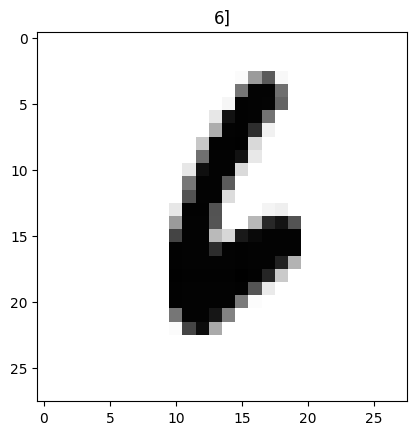

ValueError: invalid literal for int() with base 10: ''

In [16]:
# Show results
while True:
    index = int(input("Enter a number (0 - 48000): "))
    img = images[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")

    img.shape += (1,)
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"{o.argmax()}]")
    plt.show()